In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# Generate some synthetic data that is linear separable.
`sklearn.datasets.samples_generator.make_blobs` generates isotropic Gaussian blobs for clustering. Given some parameters, it will return X and y for you with shape of (n_samples, n_features) and (n_samples) respectively.

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(
    n_samples=50, 
    n_features=2, 
    centers=2,
    random_state=0, 
    cluster_std=0.6
)

print("X[0]:", X[0])
print("y[0]:", y[0])

X[0]: [ 1.41281595  1.5303347 ]
y[0]: 1


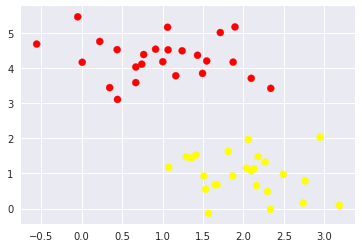

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [4]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim() # (x_min, x_max) in x-axis
    ylim = ax.get_ylim() # (y_min, y_max) in y-axis
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=150, linewidth=1, facecolors='none', color='blue');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [5]:
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
clf.support_vectors_

array([[ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 2.06156753,  1.96918596]])

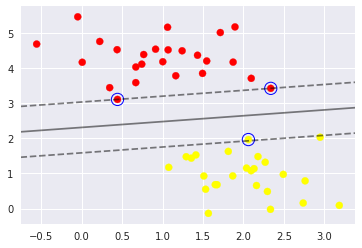

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

# What if the dataset cannot be linear separated?

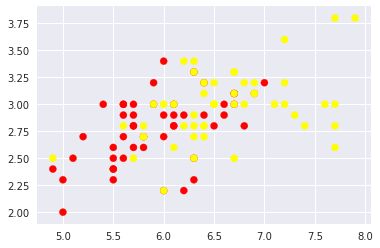

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[50:150, :2]
y = iris.target[50:150]

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

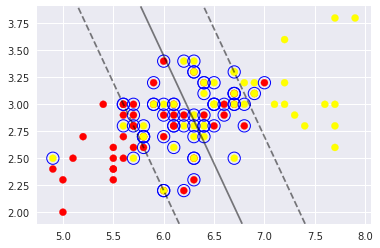

In [9]:
clf = SVC(C=100.0, kernel='linear')
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

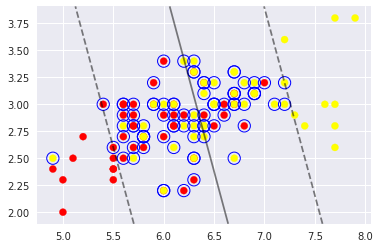

In [11]:
clf = SVC(C=0.1, kernel='linear')
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

# Question
- What is the effect of C?
- Describe how the value of C affect the number of support vector?